# <center> Trabalho 2 - Visualização de dados <center>

### Bibliotecas

In [1]:
import numpy as np                 # algebra linear
import pandas as pd                # organização e exploração de dados
import matplotlib.pyplot as plt    # gráficos e visualização de dados
import seaborn as sns              # gráficos e visualização de dados
import os

### Importação dos dados

Para os bairros disponíveis, observou-se um número de cerca de 39 mil imóveis, distribuídos ao longo de 143 bairros (embora alguns sejam classificações não oficiais).

In [2]:
path = "C:\\Users\\mateus\\Desktop\\ck0223-Mineracao_dados\\Trabalho_02\\bairros\\"
list_bairros = os.listdir(path)
list_imoveis = []
for bairro in list_bairros:
    df_temp = pd.read_csv(path + bairro,index_col = None, header = 0)
    list_imoveis.append(df_temp)
df_imoveis = pd.concat(list_imoveis, axis = 0, ignore_index = True)
df_imoveis.drop(["Unnamed: 0"], axis = 1, inplace = True)
df_imoveis = df_imoveis.dropna()
df_imoveis

,Código,Categoria,Condomínio,Área,Quartos,Banheiros,Vagas na garagem,Município,Bairro,Preço
0,976545556,Casas,0.0,108,3,2.0,2,Fortaleza,Aerolândia,180000.0
1,975806360,Apartamentos,230.0,42,2,1.0,1,Fortaleza,Alto da Balança,160000.0
2,975789387,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0
3,975789328,Casas,0.0,223,5 ou mais,3.0,1,Fortaleza,Aerolândia,250000.0
4,975752550,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0
...,...,...,...,...,...,...,...,...,...,...
39116,928536658,Casas,0.0,228,3,1,2,Fortaleza,Vila Velha,280000.0
39118,938110489,Casas,0.0,240,4,4,4,Fortaleza,Vila Velha,460000.0
39119,908357092,Casas,0.0,260,2,2,3,Fortaleza,Vila Velha,350000.0
39120,875246869,Casas,0.0,192,3,2,3,Fortaleza,Vila Velha,320000.0


In [3]:
n_bairros = df_imoveis["Bairro"].value_counts()

print("Número de bairros:", len(n_bairros))

Número de bairros: 143


### Remoção de duplicados e preços nulos

Para a correção do dataset, primeiro removeu-se possíveis elementos duplicados
com base no código de vendas do site, que totalizaram 313 objetos.

Após a remoção, optou-se por remover os itens cujo preço é igual a 0, dado o erro na criação do anúncio.
Com esse processo, 2721 imóveis foram removidos do *Dataset*.

#### 1°) Remoção dos valores duplicados

In [4]:
df_imoveis[df_imoveis.duplicated(['Código'])]

,Código,Categoria,Condomínio,Área,Quartos,Banheiros,Vagas na garagem,Município,Bairro,Preço
253,968810088,Apartamentos,484.0,70,2,3,1,Fortaleza,Aldeota,460000.0
303,969051162,Casas,0.0,236,5 ou mais,5 ou mais,2,Fortaleza,Aldeota,1300000.0
653,974985640,Apartamentos,0.0,37,1,0,1,Fortaleza,Aldeota,0.0
803,972296752,Apartamentos,850.0,148,3,3,4,Fortaleza,Aldeota,680000.0
1102,940101339,Apartamentos,0.0,80,3,2,0,Fortaleza,Aldeota,780000.0
...,...,...,...,...,...,...,...,...,...,...
27471,963030571,Apartamentos,2950.0,305,4,4,4,Fortaleza,Meireles,3200000.0
27472,940100795,Apartamentos,0.0,325,4,5 ou mais,5 ou mais,Fortaleza,Meireles,4300000.0
27473,917763151,Apartamentos,1300.0,125,3,2,1,Fortaleza,Meireles,410000.0
31456,797716658,Apartamentos,0.0,78,3,2,2,Fortaleza,Papicu,575000.0


In [5]:
df_imoveis = df_imoveis.drop_duplicates(subset = "Código")
df_imoveis

,Código,Categoria,Condomínio,Área,Quartos,Banheiros,Vagas na garagem,Município,Bairro,Preço
0,976545556,Casas,0.0,108,3,2.0,2,Fortaleza,Aerolândia,180000.0
1,975806360,Apartamentos,230.0,42,2,1.0,1,Fortaleza,Alto da Balança,160000.0
2,975789387,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0
3,975789328,Casas,0.0,223,5 ou mais,3.0,1,Fortaleza,Aerolândia,250000.0
4,975752550,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0
...,...,...,...,...,...,...,...,...,...,...
39116,928536658,Casas,0.0,228,3,1,2,Fortaleza,Vila Velha,280000.0
39118,938110489,Casas,0.0,240,4,4,4,Fortaleza,Vila Velha,460000.0
39119,908357092,Casas,0.0,260,2,2,3,Fortaleza,Vila Velha,350000.0
39120,875246869,Casas,0.0,192,3,2,3,Fortaleza,Vila Velha,320000.0


#### 2°) Remoção de Valores Vazios

In [6]:
df_imoveis = df_imoveis.loc[(df_imoveis["Preço"] != 0)]
df_imoveis

,Código,Categoria,Condomínio,Área,Quartos,Banheiros,Vagas na garagem,Município,Bairro,Preço
0,976545556,Casas,0.0,108,3,2.0,2,Fortaleza,Aerolândia,180000.0
1,975806360,Apartamentos,230.0,42,2,1.0,1,Fortaleza,Alto da Balança,160000.0
2,975789387,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0
3,975789328,Casas,0.0,223,5 ou mais,3.0,1,Fortaleza,Aerolândia,250000.0
4,975752550,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0
...,...,...,...,...,...,...,...,...,...,...
39116,928536658,Casas,0.0,228,3,1,2,Fortaleza,Vila Velha,280000.0
39118,938110489,Casas,0.0,240,4,4,4,Fortaleza,Vila Velha,460000.0
39119,908357092,Casas,0.0,260,2,2,3,Fortaleza,Vila Velha,350000.0
39120,875246869,Casas,0.0,192,3,2,3,Fortaleza,Vila Velha,320000.0


### Correção das classes e remoção de valores inconclusivos.

In [7]:
df_imoveis.head()

,Código,Categoria,Condomínio,Área,Quartos,Banheiros,Vagas na garagem,Município,Bairro,Preço
0,976545556,Casas,0.0,108,3,2.0,2,Fortaleza,Aerolândia,180000.0
1,975806360,Apartamentos,230.0,42,2,1.0,1,Fortaleza,Alto da Balança,160000.0
2,975789387,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0
3,975789328,Casas,0.0,223,5 ou mais,3.0,1,Fortaleza,Aerolândia,250000.0
4,975752550,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0


#### 1°) Categorias

In [8]:
df_imoveis["Categoria"].value_counts()

Apartamentos    24833
Casas            9157
Name: Categoria, dtype: int64

In [9]:
df_imoveis = df_imoveis.loc[(df_imoveis["Categoria"] != "Venda - casas e apartamentos")]
print(len(df_imoveis))
df_imoveis.head()

33990


,Código,Categoria,Condomínio,Área,Quartos,Banheiros,Vagas na garagem,Município,Bairro,Preço
0,976545556,Casas,0.0,108,3,2.0,2,Fortaleza,Aerolândia,180000.0
1,975806360,Apartamentos,230.0,42,2,1.0,1,Fortaleza,Alto da Balança,160000.0
2,975789387,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0
3,975789328,Casas,0.0,223,5 ou mais,3.0,1,Fortaleza,Aerolândia,250000.0
4,975752550,Apartamentos,220.0,45,2,2.0,1,Fortaleza,Alto da Balança,190000.0


#### 2°) Quartos, Banheiros e Vagas na garagem

In [10]:
Quartos = df_imoveis["Quartos"].value_counts()
Banheiros = df_imoveis["Banheiros"].value_counts()
Vagas = df_imoveis["Vagas na garagem"].value_counts()
print(Quartos)
print(Banheiros)
print(Vagas)

3            17648
2             8331
4             5366
5 ou mais     1227
1              962
2              164
3              140
0              124
4               23
1                3
0                2
Name: Quartos, dtype: int64
2            10968
3             7400
4             6456
5 ou mais     4281
1             4237
0              245
2.0            232
1.0             84
3.0             71
0.0              9
4.0              7
Name: Banheiros, dtype: int64
2            14353
1             8759
3             4763
4             2731
5 ou mais     1810
0             1338
1.0            121
2.0             63
0.0             39
3.0              7
4.0              6
Name: Vagas na garagem, dtype: int64


In [11]:
df_imoveis.loc[df_imoveis.Quartos == 0, "Quartos"] = "0"
df_imoveis.loc[df_imoveis.Quartos == 1, "Quartos"] = "1"
df_imoveis.loc[df_imoveis.Quartos == 2, "Quartos"] = "2"
df_imoveis.loc[df_imoveis.Quartos == 3, "Quartos"] = "3"
df_imoveis.loc[df_imoveis.Quartos == 4, "Quartos"] = "4"

df_imoveis.loc[df_imoveis.Banheiros == 0.0, "Banheiros"] = "0"
df_imoveis.loc[df_imoveis.Banheiros == 1.0, "Banheiros"] = "1"
df_imoveis.loc[df_imoveis.Banheiros == 2.0, "Banheiros"] = "2"
df_imoveis.loc[df_imoveis.Banheiros == 3.0, "Banheiros"] = "3"
df_imoveis.loc[df_imoveis.Banheiros == 4.0, "Banheiros"] = "4"

df_imoveis.loc[df_imoveis["Vagas na garagem"] == 0.0, "Vagas na garagem"] = "0"
df_imoveis.loc[df_imoveis["Vagas na garagem"] == 1.0, "Vagas na garagem"] = "1"
df_imoveis.loc[df_imoveis["Vagas na garagem"] == 2.0, "Vagas na garagem"] = "2"
df_imoveis.loc[df_imoveis["Vagas na garagem"] == 3.0, "Vagas na garagem"] = "3"
df_imoveis.loc[df_imoveis["Vagas na garagem"] == 4.0, "Vagas na garagem"] = "4"
df_imoveis.loc[df_imoveis["Vagas na garagem"] == "6", "Vagas na garagem"] = "5 ou mais"

df_imoveis["Vagas na garagem"].value_counts()

2            14416
1             8880
3             4770
4             2737
5 ou mais     1810
0             1377
Name: Vagas na garagem, dtype: int64

#### 3°) Condomínio

In [12]:
df_imoveis["Condomínio"].value_counts()

0.0       16931
500.0       488
600.0       486
700.0       471
1100.0      443
          ...  
238.0         1
1903.0        1
826.0         1
1299.0        1
433.0         1
Name: Condomínio, Length: 1218, dtype: int64

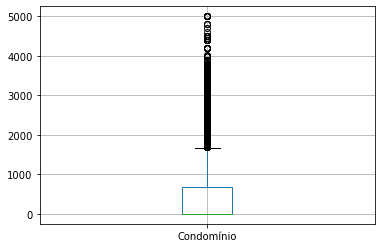

In [13]:
hist_cond_1 = df_imoveis.loc[df_imoveis["Condomínio"] <= 5000].boxplot(column = ["Condomínio"])

Considerou-se, para eliminação de *outliers*, remover os valores de condomínio acima de 5000 reais, considerados inválidos dentro do mercado de imóveis.

In [14]:
df_imoveis_cond = df_imoveis.loc[df_imoveis["Condomínio"] <= 10000]

#### 3°) Área

In [15]:
df_imoveis["Área"].value_counts()

0       2468
70       642
60       569
150      550
120      524
        ... 
592        1
496        1
432        1
16         1
5757       1
Name: Área, Length: 713, dtype: int64

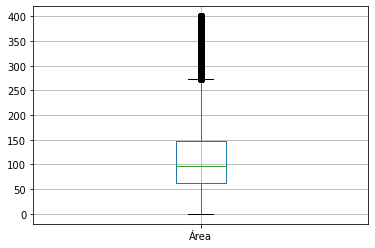

In [16]:
hist_area_1 = df_imoveis.loc[df_imoveis["Área"] <= 400].boxplot(column = ["Área"])

In [17]:
df_area = df_imoveis.loc[df_imoveis["Área"] <= 400]
df_final = df_imoveis.loc[df_imoveis["Área"] <= 5000]
df_final = df_final.loc[df_imoveis["Condomínio"] <= 10000]
df_final.head()

,Código,Categoria,Condomínio,Área,Quartos,Banheiros,Vagas na garagem,Município,Bairro,Preço
0,976545556,Casas,0.0,108,3,2,2,Fortaleza,Aerolândia,180000.0
1,975806360,Apartamentos,230.0,42,2,1,1,Fortaleza,Alto da Balança,160000.0
2,975789387,Apartamentos,220.0,45,2,2,1,Fortaleza,Alto da Balança,190000.0
3,975789328,Casas,0.0,223,5 ou mais,3,1,Fortaleza,Aerolândia,250000.0
4,975752550,Apartamentos,220.0,45,2,2,1,Fortaleza,Alto da Balança,190000.0


In [18]:
df_final.describe()

,Código,Condomínio,Área,Preço
count,3.385000e+04,33850.000000,33850.000000,3.385000e+04
mean,9.110754e+08,420.928360,128.690103,7.087892e+05
std,8.456094e+07,631.339628,148.326735,1.136148e+06
min,4.151250e+08,0.000000,0.000000,1.200000e+02
25%,8.974480e+08,0.000000,64.000000,2.500000e+05
50%,9.462099e+08,1.000000,100.000000,4.669030e+05
75%,9.640282e+08,670.000000,150.000000,7.950000e+05
max,9.776801e+08,10000.000000,4791.000000,1.007792e+08


### <center> Visualização <center>

#### <center> Variação de preço conforme a condição do imóvel <center>

In [19]:
def plotar_boxplot(x1, y1):
    y = ["0", "1", "2", "3", "4", "5 ou mais"]
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_xscale("log")
    ax = sns.boxplot(x = x1, 
                 y = y1, 
                 orient="h", 
                 width = 1,
                order = y)
    return ax

#### 1°) Variação de preço por número de quartos

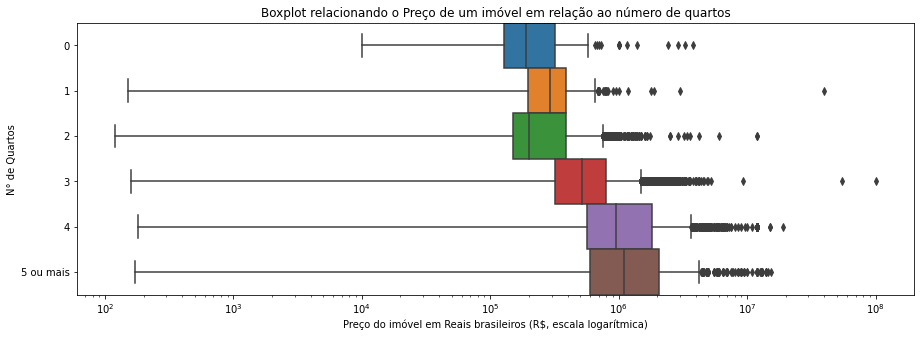

In [20]:
ax = plotar_boxplot(df_final["Preço"], df_final["Quartos"])

plt.title("Boxplot relacionando o Preço de um imóvel em relação ao número de quartos")
plt.xlabel("Preço do imóvel em Reais brasileiros (R$, escala logarítmica)")
plt.ylabel("N° de Quartos")
plt.show()

Cabe observar a utlização de uma escala logarítmica pela grande quantidade e valores maiores de _outliers_. Observa-se um variação positiva em relação ao número de quartos, com uma leve mudança em relação a mediana em casa de **2 quartos**, onde faria sentido estar mais a esquerda.

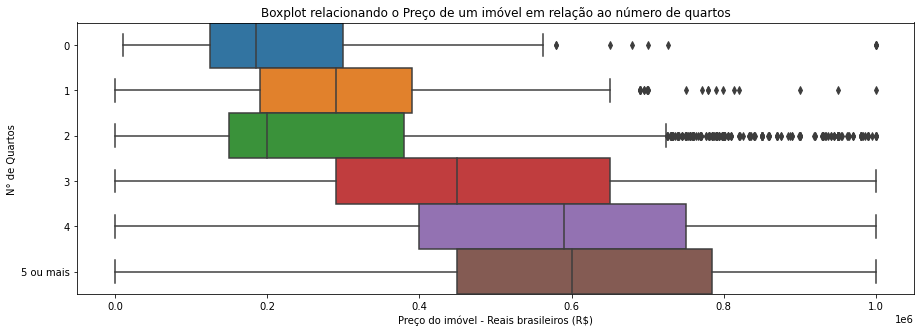

In [21]:
y = ["0", "1", "2", "3", "4", "5 ou mais"]
fig2, ax2 = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(x = df_final.loc[df_final["Preço"] <= 1000000]["Preço"], 
                 y = df_final["Quartos"], 
                 orient="h", 
                 width = 1,
                 order = y)
plt.title("Boxplot relacionando o Preço de um imóvel em relação ao número de quartos")
plt.xlabel("Preço do imóvel - Reais brasileiros (R$)")
plt.ylabel("N° de Quartos")
plt.show()

#### 2°) Preço em relação de banheiros

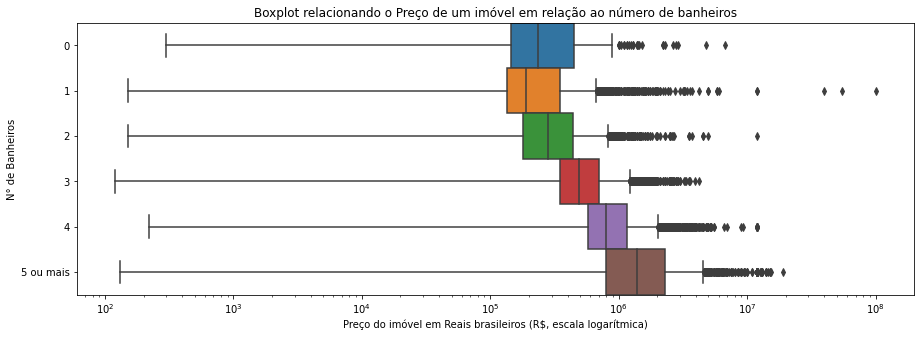

In [22]:
ax3 = plotar_boxplot(df_final["Preço"], df_final["Banheiros"])
plt.title("Boxplot relacionando o Preço de um imóvel em relação ao número de banheiros")
plt.xlabel("Preço do imóvel em Reais brasileiros (R$, escala logarítmica)")
plt.ylabel("N° de Banheiros")
plt.show()

#### 3°) Preço em relação de vagas de garagem

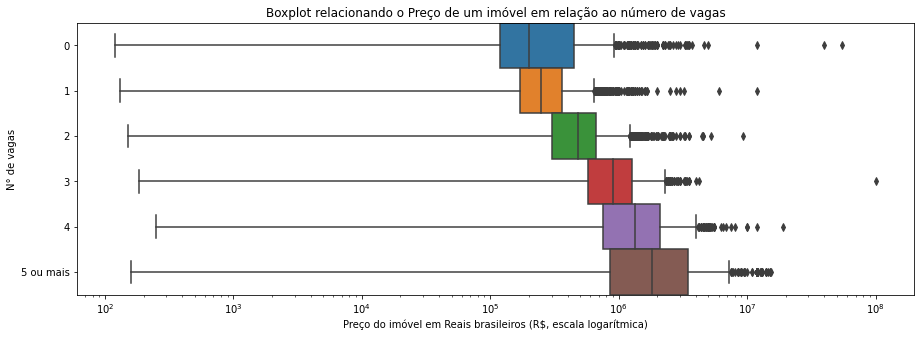

In [23]:
plotar_boxplot(df_final["Preço"], df_final["Vagas na garagem"])
plt.title("Boxplot relacionando o Preço de um imóvel em relação ao número de vagas")
plt.xlabel("Preço do imóvel em Reais brasileiros (R$, escala logarítmica)")
plt.ylabel("N° de vagas")
plt.show()

Um ponto curioso é a ausência de imóveis com valores muito baixos em relação a casas sem vagas de garagem. Um fenômeno curioso sobre o porque não existem _outliers_ nesse ponto.

#### 4°) Relação entre preço e aluguel

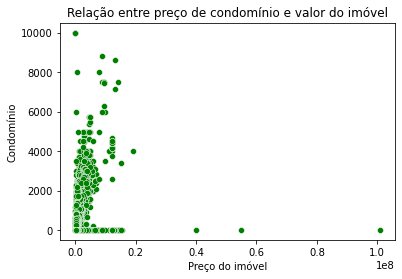

In [24]:
#fig3, ax3 = plt.figure(figsize = (5, 10))
ax3 = sns.scatterplot(data = df_final, 
                      x = "Preço", 
                      y = "Condomínio",
                      color = "g")

plt.xlabel("Preço do imóvel")
plt.title("Relação entre preço de condomínio e valor do imóvel")
plt.show()

A visualização em escala normal não é intuitiva, sendo melhor vista na escala logarítmica.

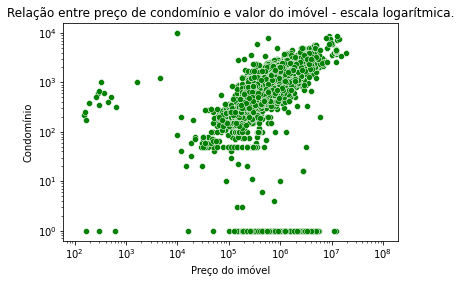

In [25]:
ax3 = sns.scatterplot(data = df_final, 
                      x = "Preço", 
                      y = "Condomínio",
                      color = "g")
ax3.set_xscale("log")
ax3.set_yscale("log")

plt.xlabel("Preço do imóvel")
plt.title("Relação entre preço de condomínio e valor do imóvel - escala logarítmica.")
plt.show()

Diferenciando imóveis <font color='blue'>com condomínio</font> e <font color='red'>sem condomínio</font>.

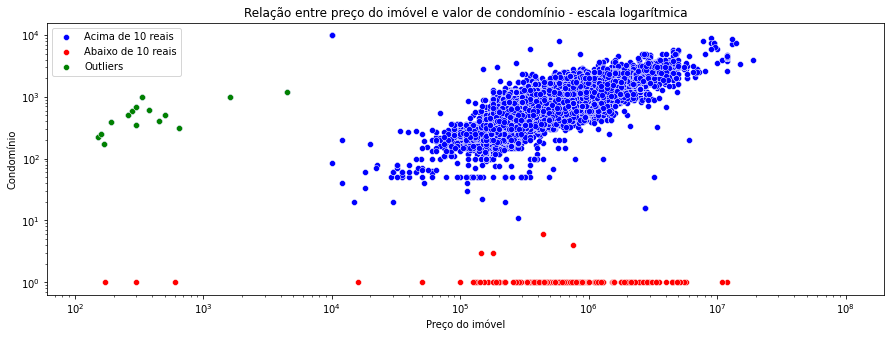

In [26]:
fig, ax3 = plt.subplots(figsize=(15, 5))
ax3 = sns.scatterplot(data = df_final.loc[df_final["Condomínio"] > 10], 
                      x = "Preço", 
                      y = "Condomínio",
                      color = "b")
ax3 = sns.scatterplot(data = df_final.loc[df_final["Condomínio"] < 10], 
                      x = "Preço", 
                      y = "Condomínio",
                      color = "r")
ax3 = sns.scatterplot(data = df_final.loc[df_final["Condomínio"] > 10].loc[df_final["Preço"] < 10000], 
                      x = "Preço", 
                      y = "Condomínio",
                      color = "g")
ax3.set_xscale("log")
ax3.set_yscale("log")
plt.xlabel("Preço do imóvel")
plt.legend(["Acima de 10 reais", "Abaixo de 10 reais", "Outliers"])
plt.title("Relação entre preço do imóvel e valor de condomínio - escala logarítmica")
plt.show()

Uma explicação para o conjunto de *outliers* no gráfico seja a presença de imóveis para alugel, ao invés de venda. Outra possível explicação são erros comuns de estrutura do anúncio.

#### 5°) Distribuição de quartos, banheiros e vagas de garagem conforme o tipo de imóvel

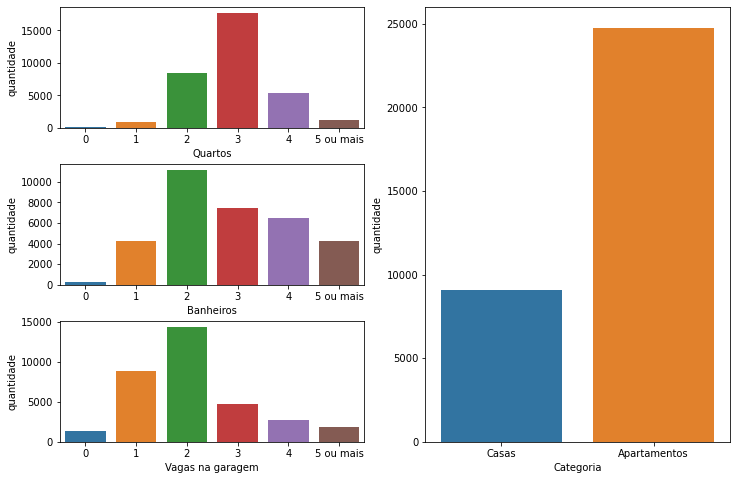

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(321)
ax2 = plt.subplot(323)
ax3 = plt.subplot(325)
ax4 = plt.subplot(122)

sns.countplot(ax = ax1, data = df_final, x = "Quartos", order = y)
sns.countplot(ax = ax2, data = df_final, x = "Banheiros", order = y)
sns.countplot(ax = ax3, data = df_final, x = "Vagas na garagem", order = y)
sns.countplot(ax = ax4, data = df_final, x = "Categoria")

ax1.set_ylabel("quantidade")
ax2.set_ylabel("quantidade")
ax3.set_ylabel("quantidade")
ax4.set_ylabel("quantidade")

fig.add_title = "Distribuição de cômodos conforme sua quantidade"
plt.show()

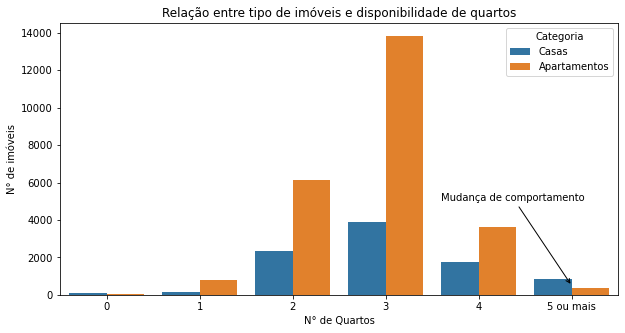

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data = df_final, x = "Quartos", hue = "Categoria", order = y)
ax.annotate("Mudança de comportamento",
           xy = (5, 500),
           xycoords = "data",
           xytext = (3.6, 5000),
           textcoords = "data",
           arrowprops = dict(arrowstyle = "->"))
plt.xlabel("N° de Quartos")
plt.ylabel("N° de imóveis")
plt.title("Relação entre tipo de imóveis e disponibilidade de quartos")
plt.show()

É notório que, de fato, existem mais apartamentos a venda em praticamente todas as categorias, assim como a tendência de uma curva normal sobre o número de quartos, visto que uma familia padrão normalmente é formada por um casal com um ou dois filhos. Ao mudar para mais de 4 quartos, é notável que a diferença diminua (e com casas ultrapassando na última categoria) dado que os valores de espaço por metro quadrado acabam se tornando maiores.

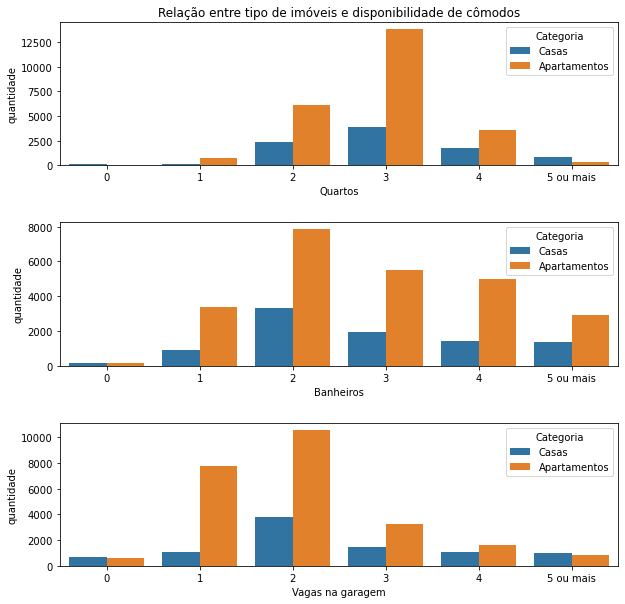

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
sns.countplot(ax = ax[0], data = df_final, x = "Quartos", hue = "Categoria", order = y)
sns.countplot(ax = ax[1], data = df_final, x = "Banheiros", hue = "Categoria", order = y)
sns.countplot(ax = ax[2], data = df_final, x = "Vagas na garagem", hue = "Categoria", order = y)

fig.subplots_adjust(hspace=0.4)
ax[0].set_ylabel("quantidade")
ax[1].set_ylabel("quantidade")
ax[2].set_ylabel("quantidade")
ax[0].set_title("Relação entre tipo de imóveis e disponibilidade de cômodos")
plt.show()

#### 6°) Relação área e preço

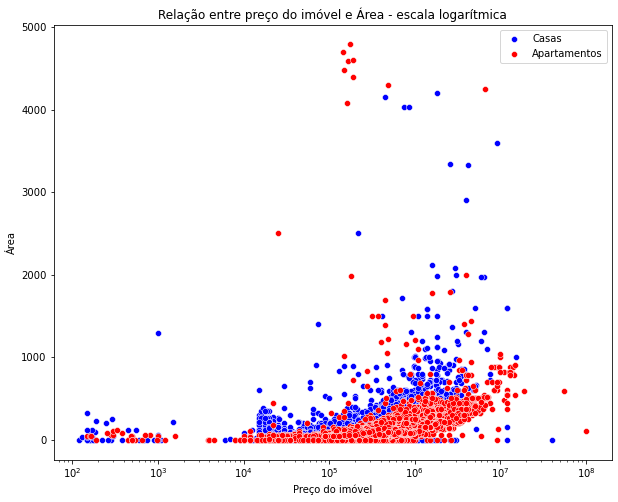

In [45]:
fig, ax3 = plt.subplots(figsize=(10, 8))
ax3 = sns.scatterplot(data = df_final.loc[df_final["Categoria"] == "Casas"], 
                      x = "Preço", 
                      y = "Área",
                      color = "b")
ax3 = sns.scatterplot(data = df_final.loc[df_final["Categoria"] == "Apartamentos"], 
                      x = "Preço", 
                      y = "Área",
                      color = "r")
ax3.set_xscale("log")
#ax3.set_yscale("log")
plt.xlabel("Preço do imóvel")
plt.legend(["Casas", "Apartamentos"])
plt.title("Relação entre preço do imóvel e Área - escala logarítmica")
plt.show()

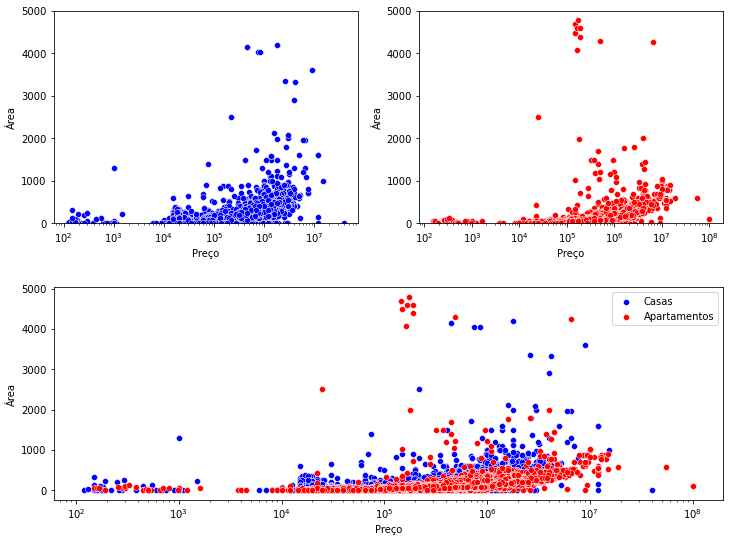

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(12, 9), sharey = True)
fig.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212)

sns.scatterplot(ax = ax1, 
                data = df_final.loc[df_final["Categoria"] == "Casas"], 
                x = "Preço", 
                y = "Área",
                color = "b")
sns.scatterplot(ax = ax2, 
                data = df_final.loc[df_final["Categoria"] == "Apartamentos"], 
                x = "Preço", 
                y = "Área",
                color = "r")
sns.scatterplot(ax = ax3, 
                data = df_final.loc[df_final["Categoria"] == "Casas"], 
                x = "Preço", 
                y = "Área",
                color = "b")
sns.scatterplot(ax = ax3, 
                data = df_final.loc[df_final["Categoria"] == "Apartamentos"], 
                x = "Preço", 
                y = "Área",
                color = "r")
ax3.legend(["Casas", "Apartamentos"])
ax1.set_ylim([0, 5000])
ax2.set_ylim([0, 5000])
ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")
plt.show()

#### 7°) Bairros com maior e menor número de banheiros

In [31]:
C_mais_b = df_final.loc[df_final['Banheiros'].isin(["2","3","4", "5 ou mais"])]["Bairro"].value_counts()
C_meno_b = df_final.loc[df_final['Banheiros'].isin(["0", "1"])]["Bairro"].value_counts()
df_banheiros = pd.DataFrame({"Mais banheiros": C_mais_b, "Menos banheiros": C_meno_b}).reset_index()
df_banheiros.rename({"index": "Bairros"}, axis = 1, inplace = True)
df_banheiros = df_banheiros.fillna(0)
df_banheiros.head()

,Bairros,Mais banheiros,Menos banheiros
0,Aerolândia,13.0,5.0
1,Aeroporto,6.0,7.0
2,Alagadiço Novo,1.0,0.0
3,Aldeota,2999.0,124.0
4,Alto Alegre,1.0,0.0


In [32]:
df_banheiros["Total"] = df_banheiros["Mais banheiros"] + df_banheiros["Menos banheiros"]
df_banheiros = df_banheiros.loc[df_banheiros["Total"] >= 30]
df_banheiros["Mais banheiros"] = df_banheiros["Mais banheiros"]/df_banheiros["Total"]*100
df_banheiros["Menos banheiros"] = df_banheiros["Menos banheiros"]/df_banheiros["Total"]*100
df_banheiros.describe()

,Mais banheiros,Menos banheiros,Total
count,91.000000,91.000000,91.000000
mean,77.461487,22.538513,365.098901
std,17.528804,17.528804,625.406447
min,18.367347,2.075099,30.000000
25%,67.117117,9.212121,68.500000
50%,84.210526,15.789474,154.000000
75%,90.787879,32.882883,367.500000
max,97.924901,81.632653,4262.000000


In [33]:
df_banheiros.sort_values(["Menos banheiros"], ascending = False).head()

,Bairros,Mais banheiros,Menos banheiros,Total
44,Dendê,18.367347,81.632653,49.0
36,Conjunto Esperança,28.888889,71.111111,45.0
39,Cristo Redentor,30.769231,69.230769,39.0
24,Canindezinho,32.432432,67.567568,37.0
20,Bonsucesso,41.176471,58.823529,34.0


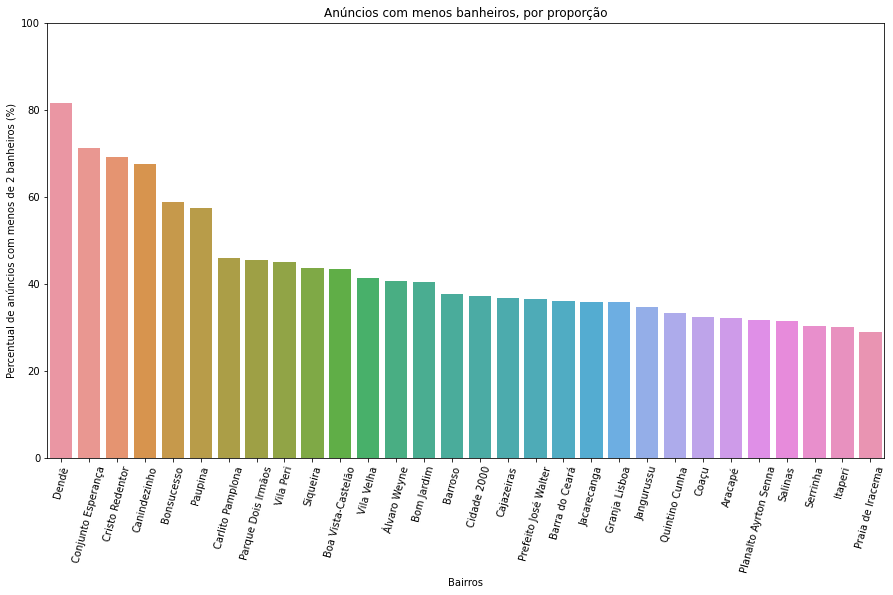

In [34]:
fig, ax3 = plt.subplots(figsize=(15, 8))
ax3 = sns.barplot(data = df_banheiros.sort_values(["Menos banheiros"], ascending = False)[:30], 
            x = "Bairros", 
            y = "Menos banheiros")
plt.xticks(rotation= 75)
ax3.set_ylim([0, 100])
plt.title("Anúncios com menos banheiros, por proporção")
plt.ylabel("Percentual de anúncios com menos de 2 banheiros (%)")
plt.show()

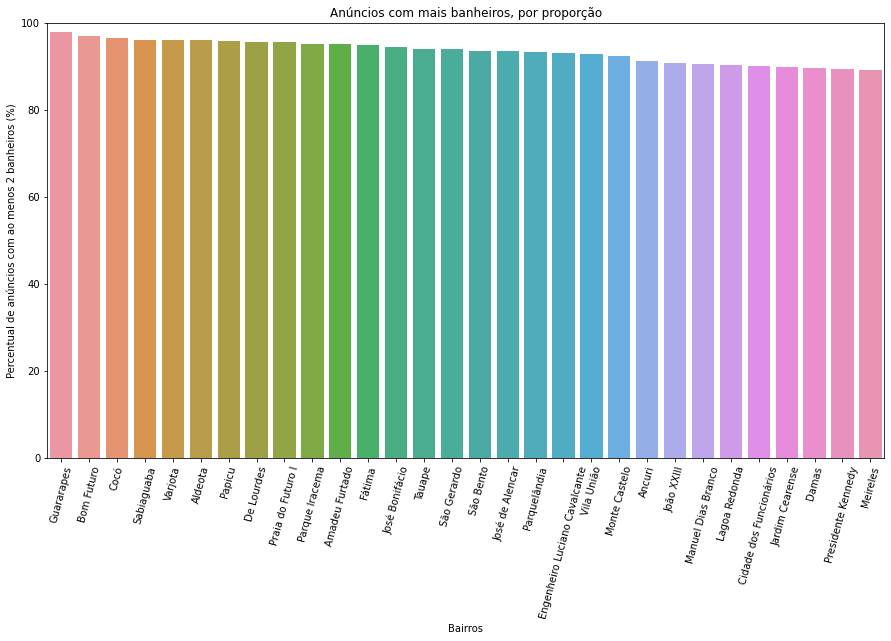

In [35]:
fig, ax3 = plt.subplots(figsize=(15, 8))
ax3 = sns.barplot(data = df_banheiros.sort_values(["Mais banheiros"], ascending = False)[:30], 
            x = "Bairros", 
            y = "Mais banheiros")
plt.xticks(rotation= 75)
ax3.set_ylim([0, 100])
plt.title("Anúncios com mais banheiros, por proporção")
plt.ylabel("Percentual de anúncios com ao menos 2 banheiros (%)")
plt.show()

Como o esperado, bairros mais periféricos estão entre os com maior número proporcional de anúncios com uma quantidade pequena de banheiros ( no máximo 1), enquanto bairros mais elitizados possuem um número maior.

#### 8° Comparação do m² de determinados bairros.

In [36]:
C_area = df_final.groupby(by=["Bairro"]).sum().groupby(level=[0]).cumsum().reset_index()
C_area["Preco m2"] = C_area["Preço"]/C_area["Área"]
C_area = C_area.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

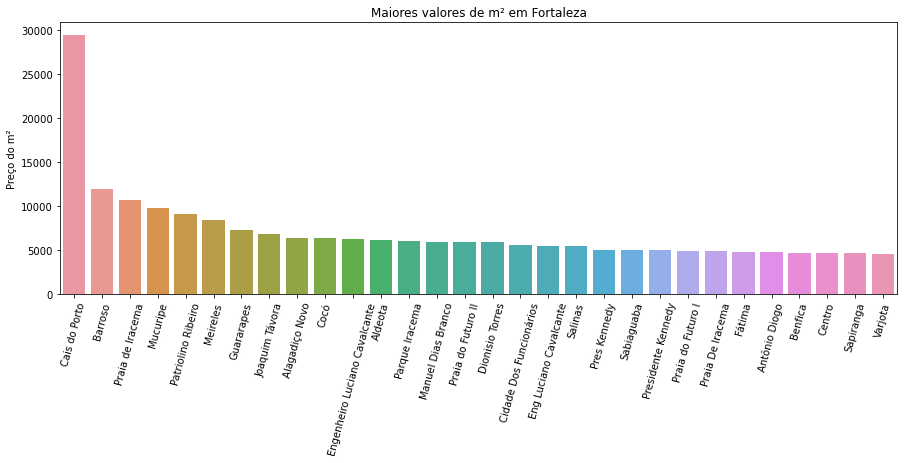

In [37]:
fig, axs = plt.subplots(figsize = (15, 5))

sns.barplot(data = C_area.sort_values(["Preco m2"], ascending = False)[:30], 
            x = "Bairro", 
            y = "Preco m2")
plt.xticks(rotation= 75)
plt.title("Maiores valores de m² em Fortaleza")
plt.ylabel("Preço do m²")
plt.xlabel("")
plt.show()

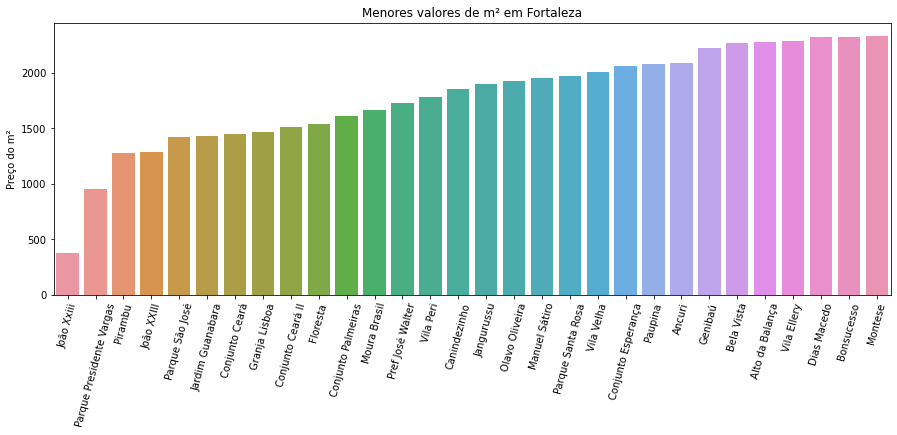

In [38]:
fig, axs = plt.subplots(figsize = (15, 5))
sns.barplot(data = C_area.sort_values(["Preco m2"])[:30], 
            x = "Bairro", 
            y = "Preco m2")
plt.xticks(rotation= 75)
plt.title("Menores valores de m² em Fortaleza")
plt.ylabel("Preço do m²")
plt.xlabel("")
plt.show()